# Activity 1 (Monday) 

#### Load library and files

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
def load_original_data():
    file1 = pd.read_csv('Data/file1.csv')
    file2 = pd.read_csv('Data/file2.csv')
    file3 = pd.read_csv('Data/file3.csv')
    file3.rename(columns={'State': 'ST', 'Gender': 'GENDER'}, inplace=True)
    return pd.concat([file1,file2,file3],ignore_index=True)

In [4]:
df = load_original_data()

In [5]:
df.shape

(12074, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12074 entries, 0 to 12073
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer                   9137 non-null   object 
 1   ST                         9137 non-null   object 
 2   GENDER                     9015 non-null   object 
 3   Education                  9137 non-null   object 
 4   Customer Lifetime Value    9130 non-null   object 
 5   Income                     9137 non-null   float64
 6   Monthly Premium Auto       9137 non-null   float64
 7   Number of Open Complaints  9137 non-null   object 
 8   Policy Type                9137 non-null   object 
 9   Vehicle Class              9137 non-null   object 
 10  Total Claim Amount         9137 non-null   float64
dtypes: float64(3), object(8)
memory usage: 1.0+ MB


#### Duplicate row cleaning

In [7]:
show_duplicates = df[df.duplicated()]
show_duplicates

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
1072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4008,GS98873,Arizona,F,Bachelor,323912.47%,16061.0,88.0,1/0/00,Personal Auto,Four-Door Car,633.6
4009,CW49887,California,F,Master,462680.11%,79487.0,114.0,1/0/00,Special Auto,SUV,547.2


In [8]:
df = df.drop_duplicates()

In [9]:
df.shape

(9135, 11)

In [10]:
# underscores

df.columns = df.columns.str.replace(' ', '_')

In [11]:
# lower case

df= df.rename(columns=str.lower)

In [12]:
# Check the datatype of resultant df

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9135 entries, 0 to 12073
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer                   9134 non-null   object 
 1   st                         9134 non-null   object 
 2   gender                     9012 non-null   object 
 3   education                  9134 non-null   object 
 4   customer_lifetime_value    9127 non-null   object 
 5   income                     9134 non-null   float64
 6   monthly_premium_auto       9134 non-null   float64
 7   number_of_open_complaints  9134 non-null   object 
 8   policy_type                9134 non-null   object 
 9   vehicle_class              9134 non-null   object 
 10  total_claim_amount         9134 non-null   float64
dtypes: float64(3), object(8)
memory usage: 856.4+ KB


#### Customer Lifetime Value [Cleaning]

In [13]:
df = df.drop(columns = 'customer')

In [14]:
df['customer_lifetime_value'].isna().value_counts()

False    9127
True        8
Name: customer_lifetime_value, dtype: int64

for idx, row in df.iterrows():
    if type(df['customer_lifetime_value']) == str:
        df.at[idx, 'customer_lifetime_value'] = int(float(df['customer_lifetime_value'].rstrip('%')))
    


In [15]:
df['customer_lifetime_value'] = df['customer_lifetime_value'].fillna(0)

In [16]:
df['customer_lifetime_value'].isna().value_counts()

False    9135
Name: customer_lifetime_value, dtype: int64

In [17]:
df['customer_lifetime_value'] = pd.to_numeric(df['customer_lifetime_value'], errors='coerce')


In [18]:
df['customer_lifetime_value'].isna().value_counts()

False    7078
True     2057
Name: customer_lifetime_value, dtype: int64

In [19]:
def remove_charac():
    
    """
    returns a list removing % character from the subset of column containing string values
    """
    lst = []
    for cell in df['customer_lifetime_value']:
        if type(cell) == str:
            cell = int(cell.rstrip("%"))
            lst.append(cell)
    return lst

    
    
    

#### Number of Open Complaints [Cleaning]

In [20]:
df['number_of_open_complaints'] = df['number_of_open_complaints'].fillna(df['number_of_open_complaints'].mode())


In [21]:
df = df[df['number_of_open_complaints'].notnull()]
print(df['number_of_open_complaints'].isna().value_counts())

False    9134
Name: number_of_open_complaints, dtype: int64


In [22]:
#This splits the Dataframe (all rows) for every occurrence of '/' 
# and then takes the value between 1st and 2nd '/'.

df['number_of_open_complaints_x'] = df['number_of_open_complaints'].str.rsplit(pat = '/')


In [23]:
df = df.drop('number_of_open_complaints', axis=1)


In [24]:
df['number_of_open_complaints_x'] = df['number_of_open_complaints_x'].str[1]


In [25]:
df.rename(columns={'number_of_open_complaints_x': 'number_of_open_complaints'}, inplace=True)

#### Filtering data and Correcting typos

In [26]:
df['st']=np.where([i.startswith("Cali") for i in df['st']],'California',df['st'])
df['st']=np.where([i.startswith("AZ") for i in df['st']],'Arizona',df['st'])
df['st']=np.where([i.startswith("WA") for i in df['st']],'Washington',df['st'])


In [27]:
df['gender'] = df['gender'].astype(str)


df['gender']=np.where([i.startswith("Male") for i in df['gender']],'M',df['gender'])
df['gender']=np.where([i.startswith("female") for i in df['gender']],'F',df['gender'])
df['gender']=np.where([i.startswith("Femal") for i in df['gender']],'F',df['gender'])

# Activity 2 (Tuesday)


#### Replacing null values

In [28]:
cols = df.select_dtypes(include=np.number).columns #columns with numeric type

df[cols] = df[cols].fillna(df.mean()) 

In [29]:
df['st'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: st, dtype: int64

In [30]:
def convert_state_to_region():
    """
    returns new dataframe after replacing values in 'st' column and converting 
    it to regions
    """
    
    for i in df['st']:
        if i == 'Oregon':
            df['st'] = df['st'].str.replace('Oregon','North West')
        elif i == 'California':
            df['st'] = df['st'].str.replace('California','West Region')
        elif i == 'Arizona'or 'Nevada':
            df['st'] = df['st'].str.replace('Arizona','Central').replace('Nevada','Central')
        elif i == 'Washington':
            df['st'] = df['st'].str.replace('Washington','East')
        else: 
            print("do nothing")
    return df
        
        
        


# Activity 3 (Wednesday)


In [31]:
def load_task3_data():
    file1 = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')
    return file1

In [32]:
data = load_task3_data()

In [33]:
data

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [34]:
numerical = df.select_dtypes(include=np.number)
categoricals = df.select_dtypes(include = np.object)

In [35]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,0.000000,0.0,1000.0,2.704934
1,8020.862355,0.0,94.0,1131.464935
2,8020.862355,48767.0,108.0,566.472247
3,8020.862355,0.0,106.0,529.881344
4,8020.862355,36357.0,68.0,17.269323
...,...,...,...,...
12069,23405.987980,71941.0,73.0,198.234764
12070,3096.511217,21604.0,79.0,379.200000
12071,8163.890428,0.0,85.0,790.784983
12072,7524.442436,21941.0,96.0,691.200000


In [36]:
categoricals['']

,st,gender,education,policy_type,vehicle_class,number_of_open_complaints
0,Washington,nan,Master,Personal Auto,Four-Door Car,0
1,Arizona,F,Bachelor,Personal Auto,Four-Door Car,0
2,Nevada,F,Bachelor,Personal Auto,Two-Door Car,0
3,California,M,Bachelor,Corporate Auto,SUV,0
4,Washington,M,High School or Below,Personal Auto,Four-Door Car,0
...,...,...,...,...,...,...
12069,California,M,Bachelor,Personal Auto,Four-Door Car,NaN
12070,California,F,College,Corporate Auto,Four-Door Car,NaN
12071,California,M,Bachelor,Corporate Auto,Four-Door Car,NaN
12072,California,M,College,Personal Auto,Four-Door Car,NaN


/Users/unmeshgupta/.local/lib/python3.8/site-packages/seaborn/distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Users/unmeshgupta/.local/lib/python3.8/site-packages/seaborn/distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Users/unmeshgupta/.local/lib/python3.8/site-packages/seaborn/distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Users/unmeshgupta/.local/lib/python3.8/site-packages/seaborn/distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


<Figure size 720x1440 with 0 Axes>

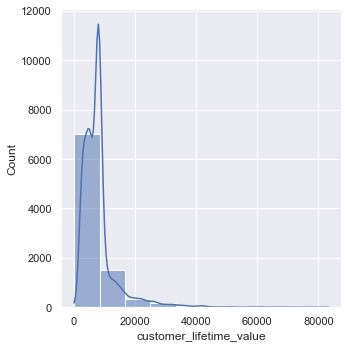

<Figure size 720x1440 with 0 Axes>

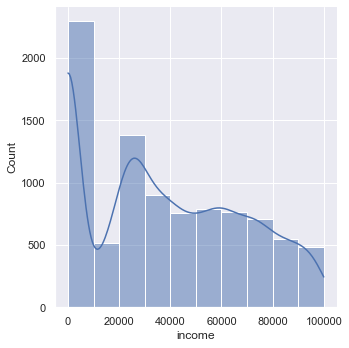

<Figure size 720x1440 with 0 Axes>

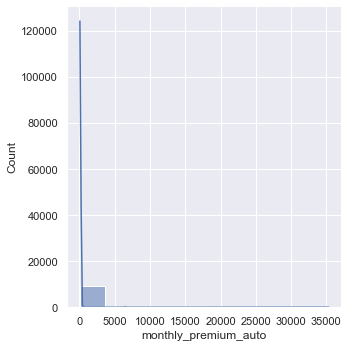

<Figure size 720x1440 with 0 Axes>

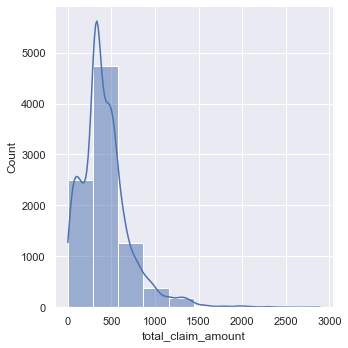

In [52]:

# a for loop to automate our task--------------
for i in numerical.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(10, 20)})
    sns.displot(numerical[i], ax=ax_hist, bins = 10 ,kde=True)

In [65]:
for i in categoricals.columns:
    print(i)

st
gender
education
policy_type
vehicle_class
number_of_open_complaints


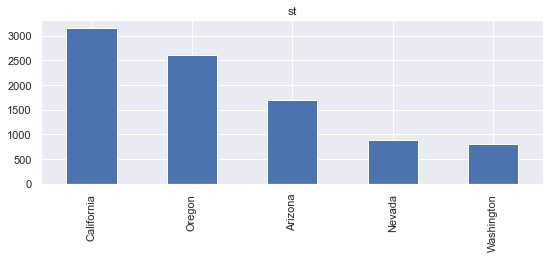

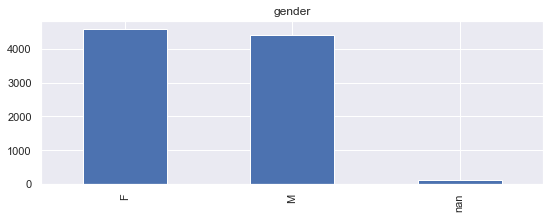

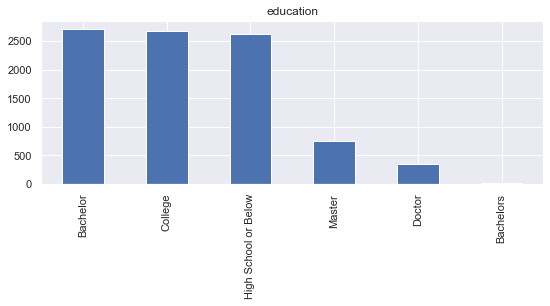

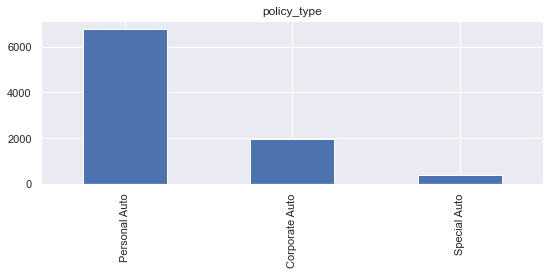

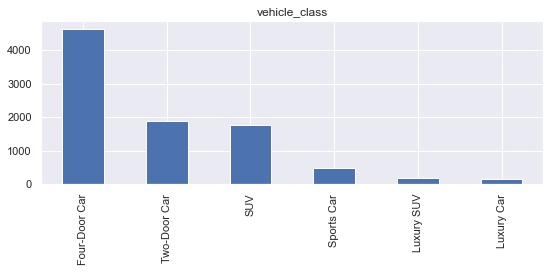

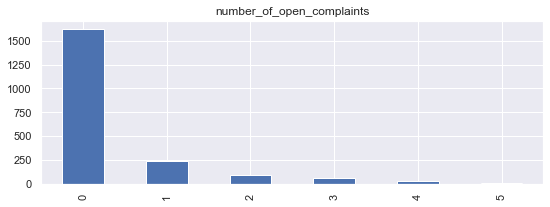

In [80]:
for i in categoricals.columns:
    
    fig, axs = plt.subplots(1, 0, figsize=(9, 3), sharey=True)
    plt.title(i)
    df[i].value_counts().plot(kind='bar')


In [82]:
df2=numerical.corr()
df2

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
customer_lifetime_value,1.000000,0.015186,0.020609,0.209802
income,0.015186,1.000000,0.021905,-0.356507
monthly_premium_auto,0.020609,0.021905,1.000000,0.013502
total_claim_amount,0.209802,-0.356507,0.013502,1.000000


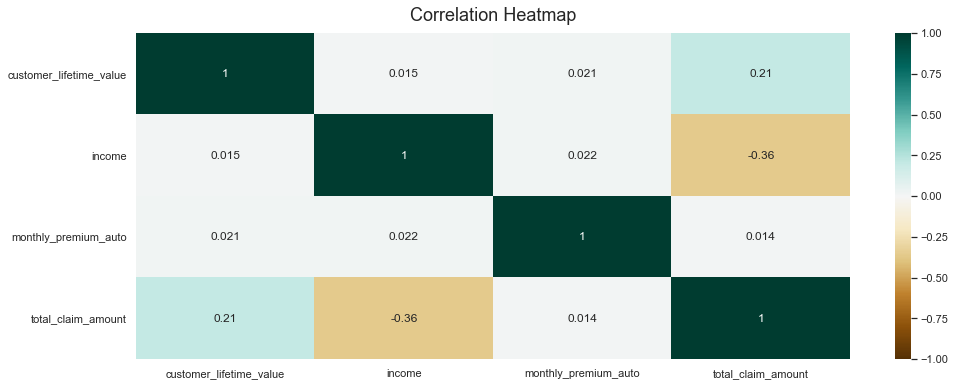

In [85]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(numerical.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
#plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')